In [107]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
#Making a list of missing value types,importing the required dataset which is an excel file and changing it into a df=dataframe
missing_values=["NaN",".."]
df = pd.read_excel('Rwanda data.xlsx',
                 sheet_name='Data',
                  na_values=missing_values)
df.head() #displays the first 5 rows

,Country Name,Country Code,Series Name,Time,gdpgr,gdpcap,gvtexp,investment,inflation,population,popgr,primeduc,seceduc,trade,seceducyrs,inflationdef
0,Rwanda,RWA,GDP growth (annual %),1960,NaN,352.825095,10.084030,NaN,NaN,2935582,2.510836,NaN,NaN,22.521004,NaN,NaN
1,Rwanda,RWA,GDP growth (annual %),1961,-4.297526,330.596417,10.163931,NaN,NaN,2998325,2.114807,NaN,NaN,21.311473,NaN,7.124714
2,Rwanda,RWA,GDP growth (annual %),1962,11.333798,361.481582,10.559998,NaN,NaN,3052936,1.804995,NaN,NaN,22.079999,NaN,-7.971334
3,Rwanda,RWA,GDP growth (annual %),1963,-9.820444,320.473231,10.937498,NaN,NaN,3105419,1.704490,NaN,NaN,18.593752,NaN,13.551229
4,Rwanda,RWA,GDP growth (annual %),1964,-12.464993,275.309479,10.769230,NaN,NaN,3164263,1.877152,NaN,NaN,24.615386,NaN,16.025004


In [109]:
#Dropping all the columns that are not of interest in the dataset
df.drop(['Country Name','Country Code','Series Name','primeduc','seceducyrs','inflationdef'],axis=1,inplace=True)

In [110]:
#Dropping 10 rows that are not required,it was stated that the time series must start at 1970
df=df.iloc[10:]

In [111]:
#Making Time the index of the dataframe  
df.set_index('Time',inplace=True)

In [112]:
df.head() #First five rows are displayed after implementing the changes above  

,gdpgr,gdpcap,gvtexp,investment,inflation,population,popgr,seceduc,trade
Time,,,,,,,,,
1970,6.001425,357.437043,8.731241,7.185084,0.514886,3757358,3.084348,NaN,26.739426
1971,1.206641,351.090214,9.896536,9.041836,0.488580,3871439,2.991022,2.51528,27.080523
1972,0.263068,341.791691,10.704847,9.515419,3.092194,3987224,2.946898,NaN,24.537445
1973,3.438088,343.281682,11.393443,9.426230,9.373674,4106407,2.945319,NaN,25.040985
1974,1.409824,337.823842,12.029288,10.460250,31.088299,4231578,3.002654,NaN,33.507676


In [113]:
#Working out the number of missing values for each column,NaN means missing value 
df.isna().sum()  

gdpgr          0
gdpcap         0
gvtexp         0
investment     0
inflation      2
population     0
popgr          0
seceduc       12
trade          0
dtype: int64

In [114]:
#Working out the percentage of missing values in order to determine whether to drop a column or treat it for missing values.
#If the missing values of a column are less than 30% those missing values are treated.
#If the missing values of a column are more than 30% the column is dropped
#But in this case the column seceduc is an important feature of the dataset that will be later on used for analysis so it cannot
#be drop and seceduc is treated for its missing values
df.isna().sum()/df.count()*100

gdpgr          0.000000
gdpcap         0.000000
gvtexp         0.000000
investment     0.000000
inflation      4.166667
population     0.000000
popgr          0.000000
seceduc       31.578947
trade          0.000000
dtype: float64

In [115]:
#Dropping all the missing values in the column inflation 
df['inflation']=df['inflation'].dropna()

In [116]:
#Treating the missing values = replacing all the missing values with the mean of the column inflation
df['inflation']=df['inflation'].fillna(df['inflation'].mean())

In [117]:
#Working out missing values in the column inflation
df['inflation'].isna().sum()

0

In [118]:
#Dropping all the missing values in the column seceduc
df['seceduc']=df['seceduc'].dropna()

In [119]:
#Treating the missing values = replacing all the missing values with the mean of the column seceduc
df['seceduc']=df['seceduc'].fillna(df['seceduc'].mean())

In [120]:
#Working out missing values in the column inflation
df['seceduc'].isna().sum()

0

In [121]:
#Working out missing values in the whole dataframe after data cleaning which was conducted above
df.isna().sum()

gdpgr         0
gdpcap        0
gvtexp        0
investment    0
inflation     0
population    0
popgr         0
seceduc       0
trade         0
dtype: int64

In [122]:
#Evaluating the first 5 rows of the dataframe
#The dataframe is clean and data visualization can be conducted
df.head()

,gdpgr,gdpcap,gvtexp,investment,inflation,population,popgr,seceduc,trade
Time,,,,,,,,,
1970,6.001425,357.437043,8.731241,7.185084,0.514886,3757358,3.084348,19.206343,26.739426
1971,1.206641,351.090214,9.896536,9.041836,0.488580,3871439,2.991022,2.515280,27.080523
1972,0.263068,341.791691,10.704847,9.515419,3.092194,3987224,2.946898,19.206343,24.537445
1973,3.438088,343.281682,11.393443,9.426230,9.373674,4106407,2.945319,19.206343,25.040985
1974,1.409824,337.823842,12.029288,10.460250,31.088299,4231578,3.002654,19.206343,33.507676


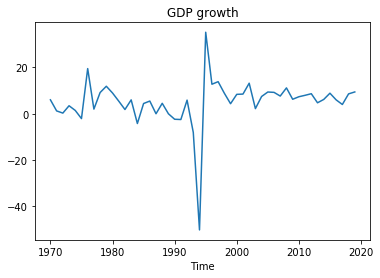

In [123]:
#Time series for GDP growth
plt.title('GDP growth')
df['gdpgr'].plot()

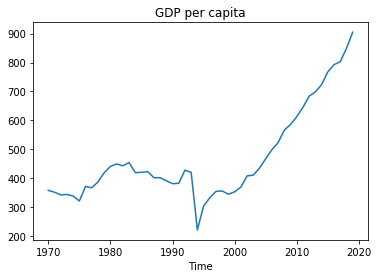

In [124]:
#Time series for GDP per capita
plt.title('GDP per capita')
df['gdpcap'].plot()

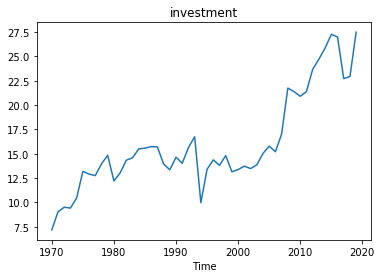

In [125]:
#Time series for investment
plt.title('investment')
df['investment'].plot()

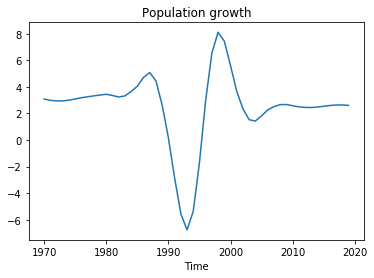

In [126]:
#Time series for population growth
plt.title('Population growth')
df['popgr'].plot()

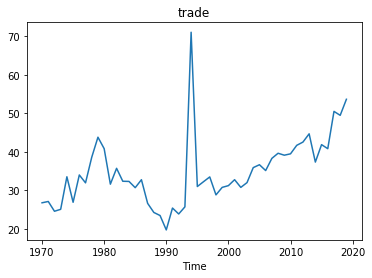

In [127]:
#Time series for trade
plt.title('trade')
df['trade'].plot()

In [131]:
#Creating a new dataframe by dropping the column gdpgr because the required correlation matrix only has 
#8 features from 8 columns
df_one=df.drop('gdpgr',axis=1)

In [132]:
#The required correlation matrix
df_one.corr()

,gdpcap,gvtexp,investment,inflation,population,popgr,seceduc,trade
gdpcap,1.000000,0.155148,0.923867,-0.210181,0.862652,0.040902,0.751521,0.508376
gvtexp,0.155148,1.000000,0.145528,0.020995,0.296333,0.056123,-0.133204,0.088943
investment,0.923867,0.145528,1.000000,-0.140615,0.886441,-0.007051,0.758719,0.477184
inflation,-0.210181,0.020995,-0.140615,1.000000,-0.273872,-0.210439,-0.124834,-0.015316
population,0.862652,0.296333,0.886441,-0.273872,1.000000,-0.005604,0.742039,0.490835
popgr,0.040902,0.056123,-0.007051,-0.210439,-0.005604,1.000000,-0.083669,-0.118346
seceduc,0.751521,-0.133204,0.758719,-0.124834,0.742039,-0.083669,1.000000,0.399826
trade,0.508376,0.088943,0.477184,-0.015316,0.490835,-0.118346,0.399826,1.000000


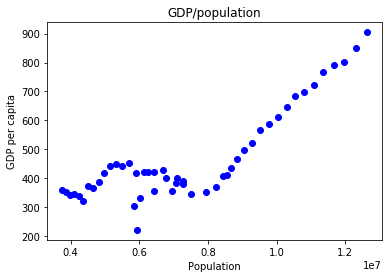

In [133]:
#Plotting a scatter
#Train data distribution
plt.scatter(df['population'],df['gdpcap'],color='blue')
plt.title('GDP/population')
plt.xlabel("Population")
plt.ylabel("GDP per capita")
plt.show()

In [134]:
#Separating the data into training and testing data
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[msk]

In [135]:
#Using sklearn package to model data
#modelling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['population']])
train_y = np.asanyarray(train[['gdpcap']])
regr.fit(train_x,train_y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'GDP per capita')

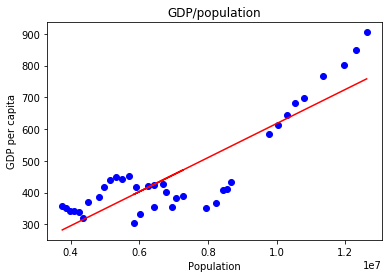

In [136]:
#Plotting the fit line over the data
plt.scatter(train['population'],train['gdpcap'],color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.title('GDP/population')
plt.xlabel("Population")
plt.ylabel("GDP per capita")

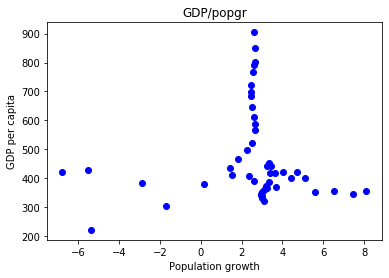

In [137]:
#Train data distribution
plt.scatter(df['popgr'],df['gdpcap'],color='blue')
plt.title('GDP/popgr')
plt.xlabel("Population growth")
plt.ylabel("GDP per capita")
plt.show()

In [138]:
#modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['popgr']])
train_y = np.asanyarray(train[['gdpcap']])
regr.fit(train_x,train_y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'GDP per capita')

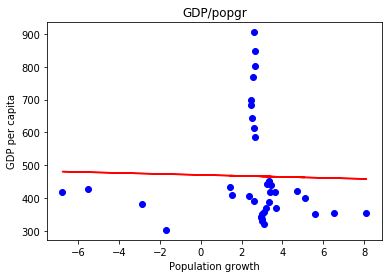

In [139]:
plt.scatter(train['popgr'],train['gdpcap'],color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.title('GDP/popgr')
plt.xlabel("Population growth")
plt.ylabel("GDP per capita")

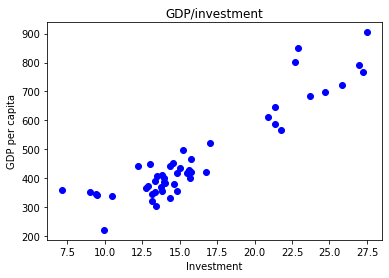

In [140]:
#Train data distribution
plt.scatter(df['investment'],df['gdpcap'],color='blue')
plt.title('GDP/investment')
plt.xlabel("Investment")
plt.ylabel("GDP per capita")
plt.show()

In [141]:
#modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['investment']])
train_y = np.asanyarray(train[['gdpcap']])
regr.fit(train_x,train_y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'GDP per capita')

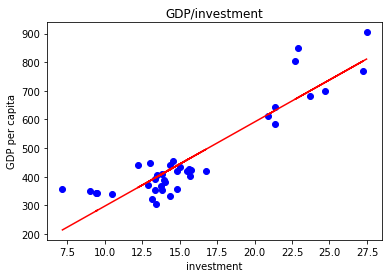

In [142]:
plt.scatter(train['investment'],train['gdpcap'],color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.title('GDP/investment')
plt.xlabel("investment")
plt.ylabel("GDP per capita")

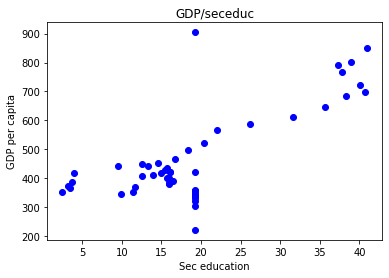

In [143]:
#Train data distribution
plt.scatter(df['seceduc'],df['gdpcap'],color='blue')
plt.title('GDP/seceduc')
plt.xlabel("Sec education")
plt.ylabel("GDP per capita")
plt.show()

In [144]:
#modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['seceduc']])
train_y = np.asanyarray(train[['gdpcap']])
regr.fit(train_x,train_y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'GDP per capita')

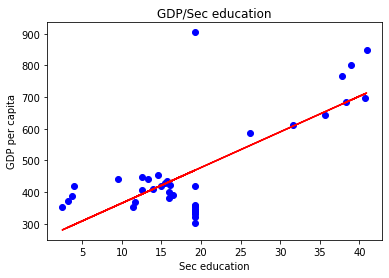

In [145]:
plt.scatter(train['seceduc'],train['gdpcap'],color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.title('GDP/Sec education')
plt.xlabel("Sec education")
plt.ylabel("GDP per capita")

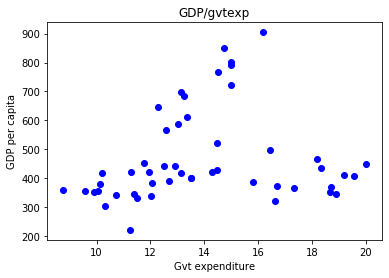

In [146]:
#Train data distribution
plt.scatter(df['gvtexp'],df['gdpcap'],color='blue')
plt.title('GDP/gvtexp')
plt.xlabel("Gvt expenditure")
plt.ylabel("GDP per capita")
plt.show()

In [147]:
#modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['gvtexp']])
train_y = np.asanyarray(train[['gdpcap']])
regr.fit(train_x,train_y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'GDP per capita')

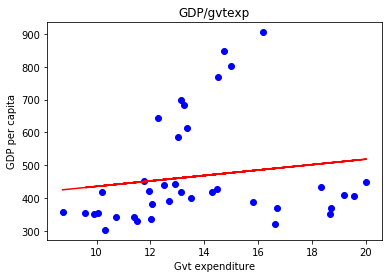

In [148]:
plt.scatter(train['gvtexp'],train['gdpcap'],color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.title('GDP/gvtexp')
plt.xlabel("Gvt expenditure")
plt.ylabel("GDP per capita")

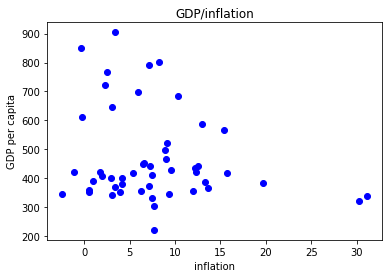

In [149]:
#Train data distribution
plt.scatter(df['inflation'],df['gdpcap'],color='blue')
plt.title('GDP/inflation')
plt.xlabel("inflation")
plt.ylabel("GDP per capita")
plt.show()

In [150]:
#modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['inflation']])
train_y = np.asanyarray(train[['gdpcap']])
regr.fit(train_x,train_y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'GDP per capita')

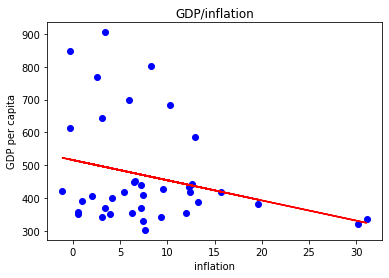

In [151]:
plt.scatter(train['inflation'],train['gdpcap'],color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.title('GDP/inflation')
plt.xlabel("inflation")
plt.ylabel("GDP per capita")

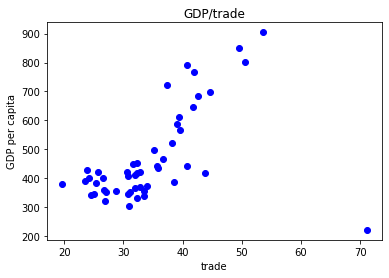

In [152]:
#Train data distribution
plt.scatter(df['trade'],df['gdpcap'],color='blue')
plt.title('GDP/trade')
plt.xlabel("trade")
plt.ylabel("GDP per capita")
plt.show()

In [153]:
#modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['trade']])
train_y = np.asanyarray(train[['gdpcap']])
regr.fit(train_x,train_y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'GDP per capita')

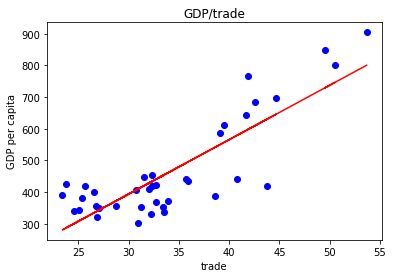

In [154]:
plt.scatter(train['trade'],train['gdpcap'],color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.title('GDP/trade')
plt.xlabel("trade")
plt.ylabel("GDP per capita")